In [100]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import f1_score

from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [33]:
df = pd.read_csv('/content/cars.csv')

In [5]:
len(df)

15953

In [6]:
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000.0,2010.0,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9.0,13.0,False,True,True,True,False,True,False,True,True,True,16.0
1,Subaru,Outback,automatic,blue,290000.0,2002.0,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12.0,54.0,False,True,False,False,True,True,False,False,False,True,83.0
2,Subaru,Forester,automatic,red,402000.0,2001.0,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4.0,72.0,False,True,False,False,False,False,False,False,True,True,151.0
3,Subaru,Impreza,mechanical,blue,10000.0,1999.0,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9.0,42.0,True,False,False,False,False,False,False,False,False,False,86.0
4,Subaru,Legacy,automatic,black,280000.0,2001.0,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14.0,7.0,False,True,False,True,True,False,False,False,False,True,7.0


In [45]:
df['engine_type'].value_counts()

gasoline    25647
diesel      12874
electric       10
Name: engine_type, dtype: int64

In [41]:
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [54]:
def preprocessing(data):
  data = data.copy()
  
  data = data.drop('model_name', axis = 1)
  data = data.dropna()

  for col in data.columns:
    if data[col].dtypes == 'bool':
      data[col] = data[col].replace({True:1, False:0})
  for col in ['manufacturer_name', 'transmission', 'color', 'engine_fuel', 'body_type', 'state','drivetrain','location_region']:
     dummies = pd.get_dummies(data[col], prefix=str(col))
     data = pd.concat([data, dummies], axis =1)
     data = data.drop(col, axis = 1)
  data['engine_type'] = data['engine_type'].replace({'gasoline':0, 'diesel': 1,'electric':2})
  data = data.sample(frac=1).reset_index(drop=True)
  X = data.drop('engine_type', axis = 1)
  y = data['engine_type']
  return X, y
  

In [55]:
X,y = preprocessing(df)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [165]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [158]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [61]:
X_train.shape

(26964, 118)

In [166]:
inputs = tf.keras.Input(shape=(118,))
x = tf.keras.layers.Dense(16, 'relu')(inputs)
x = tf.keras.layers.Dense(32, 'relu')(x)
x = tf.keras.layers.Dense(64, 'relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(128, 'relu')(x)

outputs = tf.keras.layers.Dense(3, 'softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)

In [167]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [168]:
model.fit(
    X_train, y_train,
    epochs = 1,
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(
    #         monitor='val_loss',
    #         patience=5
    #     )
    # ]
)

843/843 [==============================] - 3s 3ms/step - loss: 0.0869 - accuracy: 0.9683


In [102]:
results = []

In [169]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
result = f1_score(y_test, y_pred)
results.append(result)

In [170]:
results

[0.006654722293319682,
 0.9996144454440303,
 1.0,
 0.532857870606215,
 0.5271586236745294,
 0.285772941901047,
 0.0,
 0.9997413347128815,
 1.0,
 0.9965183752417794]

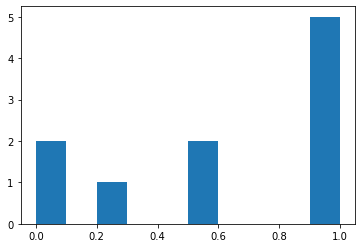

In [175]:
plt.hist(results,10)
plt.show()

In [178]:
mean  = np.mean(results)
std   = np.std(results)
variance = std*std
min   = np.min(results)
max   = np.max(results)
median= np.median(results)

In [179]:
print(mean)
print(std)
print(variance)
print(min)
print(max)
print(median)

0.6348318313873802
0.4006482610813166
0.16051902910748286
0.0
1.0
0.7646881229239972


In [185]:
results_copy = results.copy()

In [188]:
results_df = pd.DataFrame(results_copy)


In [192]:
results_df

0    0.006655
1    0.999614
2    1.000000
3    0.532858
4    0.527159
5    0.285773
6    0.000000
7    0.999741
8    1.000000
9    0.996518
Name: 0, dtype: float64

In [193]:
results_df[0].quantile([0.25,0.5,0.75])


0.25    0.346119
0.50    0.764688
0.75    0.999710
Name: 0, dtype: float64